In [1]:
import tensorflow as tf

In [31]:
tf.__version__

'1.3.0'

In [32]:
helli = tf.constant("Hello, Tensorflow")

# Tensorflow의 구동원리

- Tensorflow는 tensor라고하는 데이터(edge)가 operation등이 들어있는 Node를 통해 흐른다고 하여 Tensorflow라고한다. 따라서 Edge와 Node가 있는 Graph로 작동한다.
- 따라서 위와같이 tf.constant를 해서 NOde를 만들더라도 단순히 print하여도 원하는 값이 나오지 않고,node의 실행을 위한 Session이 필요하다. 
- 따라서 먼저 Graph를 구성하고 Session을 통해서 Graph를 실행하는 것이 가장 큰 틀이라고 할 수 있다.


In [33]:
sess = tf.Session()
print(sess.run(helli))

b'Hello, Tensorflow'


In [34]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [35]:
print("node1 : ", node1, "node2 : ", node2, "node3 : ", node3)

node1 :  Tensor("Const_7:0", shape=(), dtype=float32) node2 :  Tensor("Const_8:0", shape=(), dtype=float32) node3 :  Tensor("Add_1:0", shape=(), dtype=float32)


In [36]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3) : ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3) :  7.0


In [37]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2, 4]}))

7.5
[ 3.  7.]


# 간단한 Linear Regression


## hypothesis and cost function
- H(x) = Wx + b
- minimize cost(W,b)

1. H(x) = Wx + b

In [38]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

#Variable은 tensorflow가 사용하는 Variable이다
#tf.random_normal([1]) rank가 1인(scalar) 랜덤한 숫자를 만든다.
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = x_train * W + b

2. cost(W,b) = 1/m*summation(H(x)-y)^2

In [39]:
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

GradientDescent

In [40]:
#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [41]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

#fit the Line
for step in range(2001):
    sess.run(train)
    # 경사 하강법 20회에 한번씩 출력
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 1.7057 [ 0.86121368] [-1.06557286]
20 0.0185142 [ 0.86121368] [-1.06557286]
40 0.00293708 [ 0.86121368] [-1.06557286]
60 0.00254167 [ 0.86121368] [-1.06557286]
80 0.00230724 [ 0.86121368] [-1.06557286]
100 0.00209547 [ 0.86121368] [-1.06557286]
120 0.00190314 [ 0.86121368] [-1.06557286]
140 0.00172846 [ 0.86121368] [-1.06557286]
160 0.00156982 [ 0.86121368] [-1.06557286]
180 0.00142573 [ 0.86121368] [-1.06557286]
200 0.00129487 [ 0.86121368] [-1.06557286]
220 0.00117602 [ 0.86121368] [-1.06557286]
240 0.00106808 [ 0.86121368] [-1.06557286]
260 0.000970043 [ 0.86121368] [-1.06557286]
280 0.000881015 [ 0.86121368] [-1.06557286]
300 0.000800147 [ 0.86121368] [-1.06557286]
320 0.000726707 [ 0.86121368] [-1.06557286]
340 0.000660009 [ 0.86121368] [-1.06557286]
360 0.00059943 [ 0.86121368] [-1.06557286]
380 0.000544411 [ 0.86121368] [-1.06557286]
400 0.000494442 [ 0.86121368] [-1.06557286]
420 0.000449063 [ 0.86121368] [-1.06557286]
440 0.000407845 [ 0.86121368] [-1.06557286]
460 0.0003704

In [55]:
#placeholders를 사용해봅시다
#placeholders를 이용하면 먼저 알고리즘을 만들고 나중에 데이터를 집어넣기 용이하다. 
#Shape = [None]는 몇차원데이터든 상관없다 이경우 2
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = X * W + b
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)


sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)
    

0 16.6515 [ 0.39119714] [-0.07834136]
20 0.141075 [ 1.23881233] [ 0.22256142]
40 0.122908 [ 1.22682071] [ 0.28103614]
60 0.107336 [ 1.21198261] [ 0.33467525]
80 0.0937375 [ 1.19809973] [ 0.38479698]
100 0.0818617 [ 1.18512607] [ 0.43163612]
120 0.0714904 [ 1.173002] [ 0.47540778]
140 0.0624331 [ 1.161672] [ 0.51631284]
160 0.0545232 [ 1.15108395] [ 0.55453914]
180 0.0476156 [ 1.14118934] [ 0.59026182]
200 0.041583 [ 1.13194263] [ 0.62364507]
220 0.0363148 [ 1.12330151] [ 0.6548419]
240 0.0317139 [ 1.11522651] [ 0.68399566]
260 0.0276961 [ 1.1076802] [ 0.71124011]
280 0.0241871 [ 1.10062814] [ 0.73670024]
300 0.0211228 [ 1.09403801] [ 0.76049316]
320 0.0184467 [ 1.0878793] [ 0.78272772]
340 0.0161096 [ 1.08212399] [ 0.80350614]
360 0.0140687 [ 1.07674575] [ 0.82292372]
380 0.0122863 [ 1.07171953] [ 0.84106964]
400 0.0107297 [ 1.06702256] [ 0.85802722]
420 0.00937032 [ 1.06263316] [ 0.87387431]
440 0.00818317 [ 1.05853128] [ 0.88868344]
460 0.00714641 [ 1.05469799] [ 0.90252274]
480 0.00

In [56]:
# testing our model
print(sess.run(hypothesis, feed_dict = {X: [5]}))
print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

[ 6.10041332]
[ 3.59966969]
[ 2.59937215  4.599967  ]


# Minimizing Cost
- gradient descent

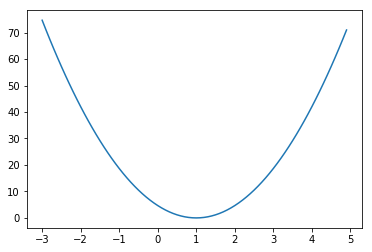

In [73]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]
W= tf.placeholder(tf.float32)
hypothesis = X * W
#cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#Launch the graph in the graph
sess = tf.Session()
#Initialize global variables in the graph
sess.run(tf.global_variables_initializer())
#비용함수 그리기 위한 변수들을 위한 list 생성
W_val = []
cost_val = []
for i in range(-30, 50):
    #(-3,5)구간에서 plotting
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# 비용함수 plotting
plt.plot(W_val, cost_val)
plt.show()

## 경사하강법
경사를 이용하기 위해 미분한다

In [75]:
# W -= Learning_rate * derivative of cost function
W = tf.Variable(tf.random_normal([1]), name = 'weight')
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
#tensorflow 에서는 -=를 통해서 업데이트가 안되므로 assigin()이용
update = W.assign(descent)

## 전체 코드

In [76]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]
W= tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# our Hypothesis for linear model (simplified) X * W
hypothesis = X * W
# cost/ Loss Function
cost = tf.reduce_mean(tf.square(hypthesis - Y))

#minimize 
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

#launch the graph in a session
sess = tf.Session()
# initialize global function variable in the graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 48.1542 [ 0.25972909]
1 48.1542 [ 0.60518885]
2 48.1542 [ 0.78943408]
3 48.1542 [ 0.88769817]
4 48.1542 [ 0.94010568]
5 48.1542 [ 0.96805638]
6 48.1542 [ 0.98296338]
7 48.1542 [ 0.99091381]
8 48.1542 [ 0.99515402]
9 48.1542 [ 0.99741548]
10 48.1542 [ 0.99862158]
11 48.1542 [ 0.99926484]
12 48.1542 [ 0.99960792]
13 48.1542 [ 0.99979091]
14 48.1542 [ 0.99988848]
15 48.1542 [ 0.99994051]
16 48.1542 [ 0.99996829]
17 48.1542 [ 0.99998307]
18 48.1542 [ 0.999991]
19 48.1542 [ 0.99999517]
20 48.1542 [ 0.99999744]


## tensorflow에서의 GradientDescent

In [90]:
X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(70.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#tensorflow에서는 메소드로 존재한다. 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)
                        

sess = tf.Session()
sess.run(tf.global_variables_initializer())
                                
for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 70.0
1 5.6
2 1.30667
3 1.02044
4 1.00136
5 1.00009
6 1.00001
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [94]:
#tensorflow 안에서 grdient를 손대고 싶을 떄 사용하는 방법
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)
hypothesis = X * W

#직접 구한 gradient값
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

#Gradient값을 얻는다.
gvs = optimizer.compute_gradients(cost)

#Gradient 적용
apply_gradient = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradient)

TypeError: Fetch argument None has invalid type <class 'NoneType'>